## FLIGHT PRICE PREDICTION

In [ ]:
#import all important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install openpyxl # library required for reading excel files

In [ ]:
df1=pd.read_excel("Data_Train.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df2=pd.read_excel("Test_set.xlsx")
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
df=pd.concat([df1,df2],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
#Feature Engineering
df["Date"] = df['Date_of_Journey'].str.split('/').str[0]
df["Month"] = df['Date_of_Journey'].str.split('/').str[1]
df["Year"] = df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
# Now converting the newly created series into int type
df["Date"]=df['Date'].astype('int64')
df["Month"]=df['Month'].astype('int64')
df["Year"]=df['Year'].astype('int64')

In [ ]:
#Inorder to check it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [ ]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [ ]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0
Price,2671


In [ ]:
# Now first we will split the arrival time from the date which is also written in their column
df['Arrival_Time']=df['Arrival_Time'].str.split(" ").str[0]

In [ ]:
# Now spliting the arrival_time into seprate hours and mins and then dropping the arrival_time column
df["Arrival_hour"]=df['Arrival_Time'].str.split(':').str[0]
df["Arrival_min"]=df['Arrival_Time'].str.split(':').str[1]
df['Arrival_min']

,Arrival_min
0,10
1,15
2,25
3,30
4,35
...,...
13349,25
13350,55
13351,25
13352,15


In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [ ]:
df['Arrival_hour']=df["Arrival_hour"].astype("int64")
df['Arrival_min']=df["Arrival_min"].astype("int64")

In [ ]:
df.drop("Arrival_Time",axis=1,inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [ ]:
# Now spliting the departure_time into seprate hours and mins and then dropping the departure_time column
df["Dep_hour"]=df['Dep_Time'].str.split(':').str[0]
df["Dep_min"]=df['Dep_Time'].str.split(':').str[1]
df['Dep_hour']=df["Dep_hour"].astype("int64")
df['Dep_min']=df["Dep_min"].astype("int64")
df.drop("Dep_Time",axis=1,inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dep_hour         13354 non-null  int64  
 14  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.5+ MB


In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [ ]:
df.drop('Route',axis=1,inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [ ]:
def time_to_min(x) :
  minutes=0
  if 'h' in x :
    h = int(x.split('h')[0])
    minutes+=h*60
    x=x.split('h')[1]
  if 'm'in x :
    m = int(x.strip().split('m')[0])
    minutes += m
  return minutes


In [ ]:
#Now converting total duration time into minutes so that during model training the data is in simplest of the forms
df["Duration_in_Min"]=df['Duration'].apply(time_to_min)
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,445


In [ ]:
df.drop('Duration',axis=1,inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Total_Stops      13353 non-null  float64
 4   Additional_Info  13354 non-null  object 
 5   Price            10683 non-null  float64
 6   Date             13354 non-null  int64  
 7   Month            13354 non-null  int64  
 8   Year             13354 non-null  int64  
 9   Arrival_hour     13354 non-null  int64  
 10  Arrival_min      13354 non-null  int64  
 11  Dep_hour         13354 non-null  int64  
 12  Dep_min          13354 non-null  int64  
 13  Duration_in_Min  13354 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.4+ MB


In [ ]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df["Additional_Info"].replace('No info','No Info',inplace=True)

/tmp/ipython-input-37-922304944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Additional_Info"].replace('No info','No Info',inplace=True)


In [ ]:
#now to convert all the other remaining object data types we one hot encoding as it is best for most Machine learing models as it treats
#all variables equally rather than label encoding as it involves ranking. Label encodings are better for trees.


In [ ]:
df=pd.get_dummies(df,columns=['Airline', 'Source', 'Destination','Additional_Info'],drop_first=True,dtype=int)

In [ ]:
df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0.0,3897.0,24,3,2019,1,10,22,20,170,...,0,1,0,0,0,0,0,1,0,0
1,2.0,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,1,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,0,0,0,0,0,1,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,1,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,285,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(13354, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   13353 non-null  float64
 1   Price                                         10683 non-null  float64
 2   Date                                          13354 non-null  int64  
 3   Month                                         13354 non-null  int64  
 4   Year                                          13354 non-null  int64  
 5   Arrival_hour                                  13354 non-null  int64  
 6   Arrival_min                                   13354 non-null  int64  
 7   Dep_hour                                      13354 non-null  int64  
 8   Dep_min                                       13354 non-null  int64  
 9   Duration_in_Min                               13354 non-null 

In [ ]:
df.head(10)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0.0,3897.0,24,3,2019,1,10,22,20,170,...,0,1,0,0,0,0,0,1,0,0
1,2.0,7662.0,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,1,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,0,0,0,0,0,1,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,1,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,285,...,0,1,0,0,0,0,0,1,0,0
5,0.0,3873.0,24,6,2019,11,25,9,0,145,...,0,0,0,0,0,0,0,1,0,0
6,1.0,11087.0,12,3,2019,10,25,18,55,930,...,0,1,0,0,0,0,1,0,0,0
7,1.0,22270.0,1,3,2019,5,5,8,0,1265,...,0,1,0,0,0,0,0,1,0,0
8,1.0,11087.0,12,3,2019,10,25,8,55,1530,...,0,1,0,0,0,0,1,0,0,0
9,1.0,8625.0,27,5,2019,19,15,11,25,470,...,0,0,0,0,0,0,0,1,0,0


## DATA VISUALIZATION

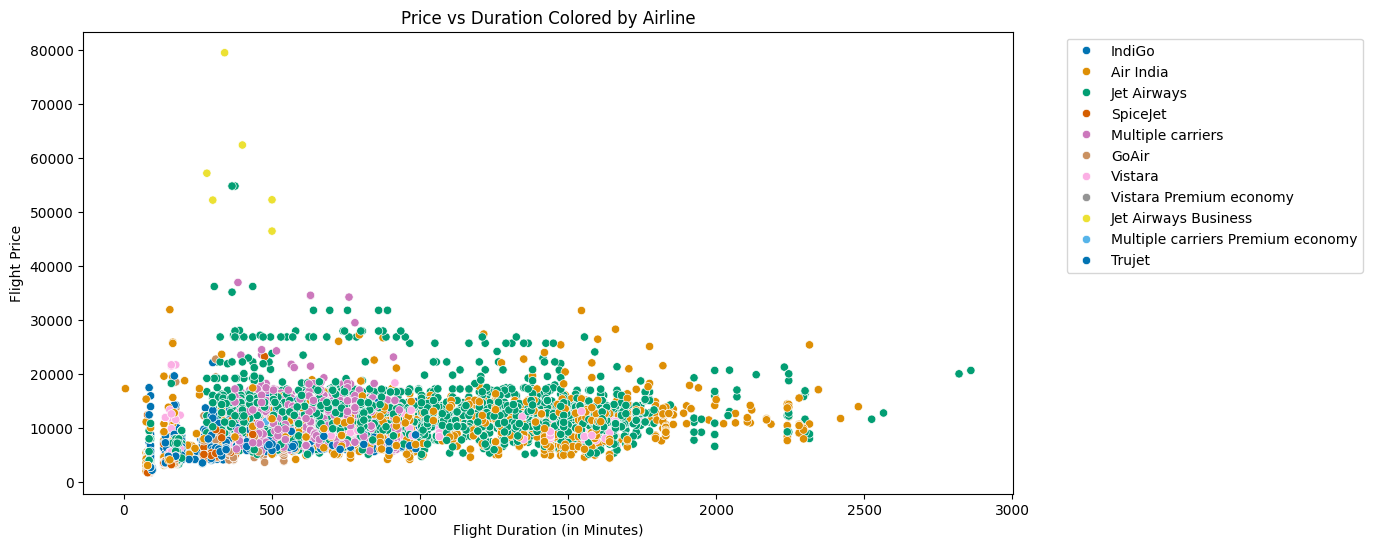

In [ ]:
# VISUALIZE HOW DURATION OF FLIGHT EFFECTS THE PRICE OF FLIGHT
airlines=[col for col in df.columns if col.startswith('Airline_')]
df["Airlines"]=df[airlines].idxmax(axis=1).str.replace('Airline_','')
pyplot.figure(figsize=(12,6))
sns.scatterplot(x='Duration_in_Min', y='Price', hue="Airlines", palette='colorblind', data=df)
pyplot.title("Price vs Duration Colored by Airline")
pyplot.xlabel("Flight Duration (in Minutes)")
pyplot.ylabel("Flight Price")
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

##OBSERVATIONS


1.   The highest paid flights Jet airways business.
2.   The most economical of all is Indigo.
3.   Jet Airways appears to operate the highest number of flights in the dataset.
4.   There is a slight upward trend in price as the flight duration increases for Jet Airways makes their strategy most reasonable among all the airlines.


/tmp/ipython-input-45-465090192.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


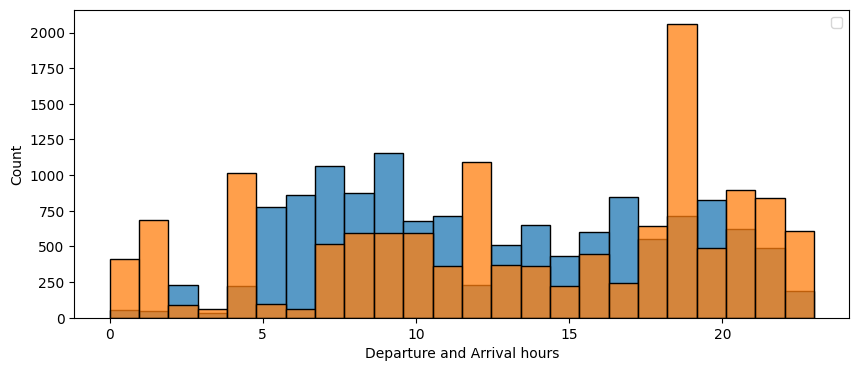

In [ ]:
#Visualizations of Peak Hours at Airplot
pyplot.figure(figsize=(10,4))
sns.histplot(df['Dep_hour'], bins=24)
sns.histplot(df['Arrival_hour'], bins=24)
pyplot.xlabel("Departure and Arrival hours")
pyplot.legend()

##OBSERVATIONS


1.   The peak hours of most airlines is around 5pm to 7pm.
2.   Least number of flights flew around 2am to 4am.



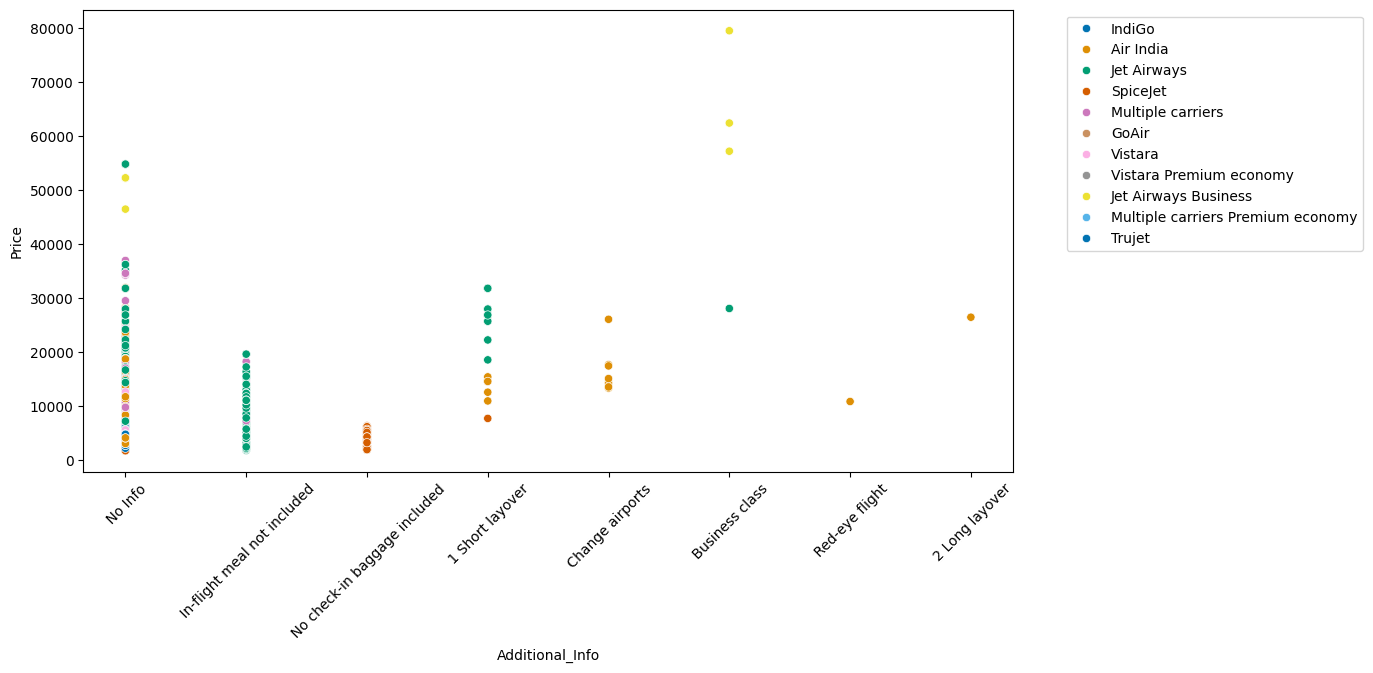

In [ ]:
# Visualize the effect of Additional info on Price of Ticket
add_info=[col for col in df.columns if col.startswith("Additional_Info_")]
df["Additional_Info"]=df[add_info].idxmax(axis=1).str.replace("Additional_Info_"," ")
pyplot.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Additional_Info',y='Price',hue="Airlines",palette="colorblind")
pyplot.xticks(rotation=45)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')